## **Exploratory Data Analysis (EDA) & Preprocessing**

### Loading and Preparing the Dataset:

We are using the Mushroom Dataset, which contains various attributes of mushrooms classified as either edible or poisonous. We have to create a Logistic Regression classifier which is first trained on the original data and then on the PCA transformed data. The following is a brief structure of the dataset.

In [149]:
import pandas as pd
import numpy as np
df = pd.read_csv('mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


We will now separate the target variable, which is the class of the mushroom, from the input features, which consist of the remaining features.

In [150]:
y = df[['class']].copy()
X=df.drop(columns=['class'])

The classification of mushrooms is given in terms of p and e, which stand for poisonous and edible respectively. We can also observe that the other attributes contain multiple categories. To build a logistic regression model, these labels must be converted into numerical form.

For the target feature (class of the mushroom), we assign label 0 to poisonous mushrooms and label 1 to edible mushrooms while for the input features, we apply one-hot encoding. Since many features contain more than two categories, assigning arbitrary numbers would incorrectly imply an ordering among the categories. One-hot encoding avoids this issue by representing each category of a feature as a separate binary variable.

In [151]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [152]:
import pandas as pd
y['class'] = y['class'].map({'p': 0, 'e': 1}).astype(int)
X = pd.get_dummies(X, drop_first=False, dtype=int)
X.head()


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [153]:
'''df['class']=df['class'].replace({'p':0,'e':1})

for cols in df.columns:
  if cols=='class':
    continue
  s=set()
  for val in df[cols]:
    s.add(val)
  for val in s:
    df[cols+'_'+val]=np.where(df[cols] == val, 1, 0)
  df.drop(cols, axis=1, inplace=True)
print(df)'''

"df['class']=df['class'].replace({'p':0,'e':1})\n\nfor cols in df.columns:\n  if cols=='class':\n    continue\n  s=set()\n  for val in df[cols]:\n    s.add(val)\n  for val in s:\n    df[cols+'_'+val]=np.where(df[cols] == val, 1, 0)\n  df.drop(cols, axis=1, inplace=True)\nprint(df)"

### Initial Analysis:

The original dataset contained 22 columns (we are excluding the target column). Lets look at how much it has increased after performing one hot encoding.

In [154]:
print("Number of columns:", X.shape[1])

Number of columns: 117


After performing one hot encoding the number of columns has increased to 117 which is a significant increase to the dimension of the dataset.

### Standardization

We need to standardize the data if we are using PCA even though it has not no impact on normal logistic regression because PCA projects the original data onto directions that maximize variance. **If the features are not standardized, principal components will be dominated by features with larger variances, regardless of their relative importance. To prevent this bias and ensure all features contribute equally, we standardize the data before applying PCA.**

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dX = scaler.fit_transform(X)
dfx = pd.DataFrame(data=dX,columns=X.columns[:])
dfx.head(10)



,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
5,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
6,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
7,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,-0.677534,1.226505,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
8,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,-0.426029,1.005431,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
9,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582


## **Principal Component Analysis**

### Apllying PCA

After applying one-hot encoding and standardization of our datset, we now apply Principal Component Analysis (PCA). At this stage, we do not restrict the number of components, allowing PCA to compute as many principal components as there are input features. This ensures that we capture the full variance structure of the dataset which will help us in identifying the number of principal components we need to retain in later stages of analysis.

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca=pca.fit(dfx)

### Scree Plot & Optimal Components

The explained variance ratio represents the proportion of the total variance captured by each principal component. The explained variance plot therefore help us to understand how much each component contributes to capturing the variability in the data.

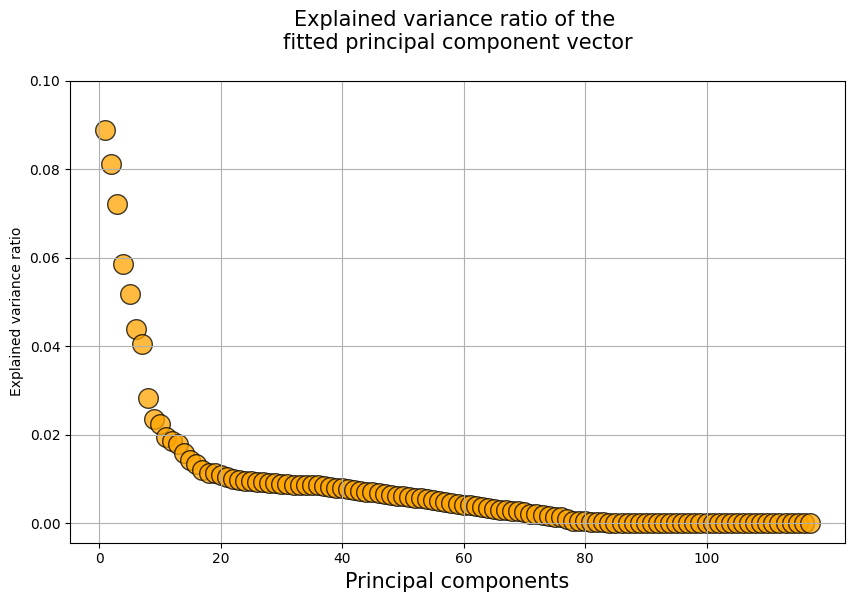

117


In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
    y=dfx_pca.explained_variance_ratio_,
    s=200, alpha=0.75, c='orange', edgecolor='k'
)

# Set custom ticks
plt.xticks(range(0, len(dfx_pca.explained_variance_ratio_)+1, 20), fontsize=10)
plt.yticks([round(i,2) for i in [j*0.02 for j in range(6)]], fontsize=10)

# Add vertical grid lines at 20-unit intervals
plt.grid(True, which='both', axis='x')
# Add horizontal grid lines at 0.2-unit intervals
plt.grid(True, which='both', axis='y')

plt.title("Explained variance ratio of the \nfitted principal component vector\n", fontsize=15)
plt.xlabel("Principal components", fontsize=15)
plt.ylabel("Explained variance ratio", fontsize=10)

plt.show()

print(len(dfx_pca.explained_variance_ratio_))


The cumulative explained variance ratio shows the proportion of the total variance captured by the first k principal components. The cumulative explained variance plot therefore indicates how many components are needed to capture most of the variance in the data. We will aim to retain 90% of the variance.

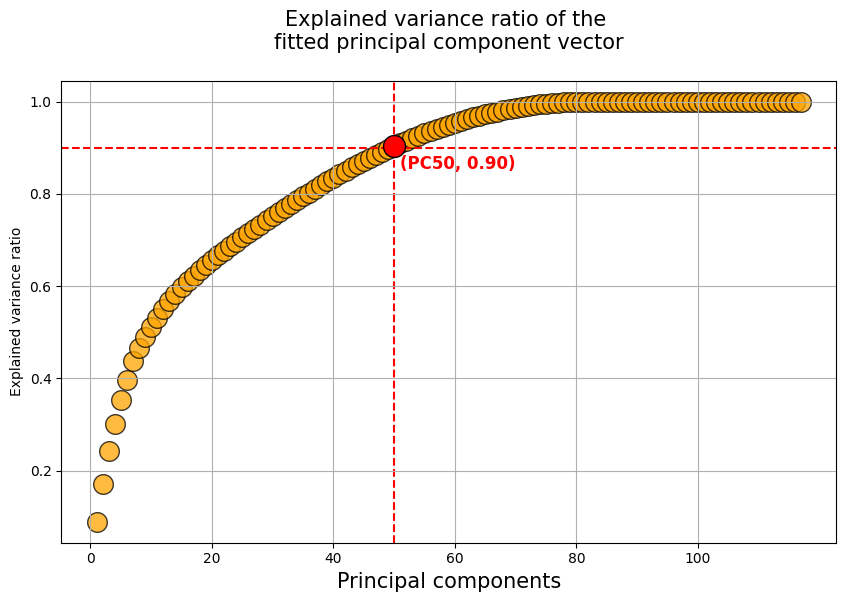

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Cumulative variance
cumm_var = list(dfx_pca.explained_variance_ratio_.cumsum())
x_vals = [i+1 for i in range(len(cumm_var))]

# Scatter plot (all orange first)
plt.scatter(x=x_vals, y=cumm_var, s=200, alpha=0.75, c='orange', edgecolor='k')

plt.xticks(range(0, len(cumm_var)+1, 20), fontsize=10)
plt.yticks([round(i,1) for i in [j*0.2 for j in range(6)]], fontsize=10)

# Grid
plt.grid(True, which='both', axis='x')
plt.grid(True, which='both', axis='y')

plt.title("Explained variance ratio of the \nfitted principal component vector\n", fontsize=15)
plt.xlabel("Principal components", fontsize=15)
plt.ylabel("Explained variance ratio", fontsize=10)

# Find the first component index where cumulative variance > 0.8
for i, val in enumerate(cumm_var):
    if val > 0.9:
        cutoff_idx = i + 1
        cutoff_val = val
        break

# Draw red lines first (low zorder so they go behind)
plt.axhline(y=0.9, color='red', linestyle='--', zorder=1)
plt.axvline(x=cutoff_idx, color='red', linestyle='--', zorder=1)

# Highlight the particular marker in red (higher zorder so it's on top)
plt.scatter(cutoff_idx, cutoff_val, s=250, c='red', edgecolor='k', zorder=5)

# Add text label
plt.text(cutoff_idx+1, cutoff_val-0.05, 
         f"(PC{cutoff_idx}, {cutoff_val:.2f})", 
         color='red', fontsize=12, fontweight='bold')

plt.show()


From the above result we will use first 50 prinipal components as it retains 90% of the data

### Visualization

We now project our input data onto the first 50 principal component axes 

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(dfx)
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans, columns=[f'PC{i+1}' for i in range(dfx_trans.shape[1])])
dfx_trans.head(10)




,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,3.284737,1.020105,-1.353591,-1.361726,-0.478375,-0.486227,-2.988416,-1.085874,4.908155,4.233882,...,1.541009,0.472998,0.742095,-0.231228,-0.344674,-0.499488,-1.319541,1.413750,1.306765,0.818898
1,3.969481,-0.856895,0.237503,-1.903058,1.281135,-2.193247,-4.367826,-0.494000,-0.960146,-1.858999,...,1.537730,1.114419,0.605442,0.402342,-0.265894,-1.692688,-2.490541,1.712418,1.051422,-1.105936
2,4.958586,-0.211112,0.466430,-1.557341,1.971429,-3.363282,-5.567695,-0.925606,-2.946658,-1.862181,...,-0.652744,0.751322,-0.127668,-0.694917,0.275646,2.062162,0.752280,0.727527,-0.144420,0.549405
3,3.469967,0.337933,-1.334981,-0.881358,-0.008583,-0.638624,-3.126145,-0.874086,4.493688,4.287290,...,-1.052655,0.336511,-0.009198,-0.603181,-0.307775,0.988875,0.671259,-0.114947,0.837418,1.099858
4,2.726570,0.889648,-2.051852,-4.117670,-2.710545,2.501482,1.354385,0.029147,-0.451190,-1.160304,...,2.871383,0.356823,1.100262,0.087156,-0.241843,-1.778571,-0.811090,1.283485,-1.144353,-0.250105
5,3.812989,-1.267767,0.353288,-0.865661,1.721261,-2.135794,-4.219419,-0.064515,-0.860122,-2.232315,...,-0.557427,1.129106,-0.383225,0.286342,-0.664080,-1.485954,-1.338601,-0.074403,1.093916,-0.147304
6,4.518180,-0.623080,0.571540,-1.897123,2.189959,-3.759886,-5.594440,-1.067531,-3.531083,-1.511509,...,-0.237134,0.290374,0.023113,-0.522157,0.507359,2.027870,1.410683,-0.991300,-0.777924,0.458935
7,4.805180,-0.570956,0.310366,-1.130596,1.966954,-2.770101,-5.313274,-0.514700,-1.348041,-1.751957,...,-1.333655,-0.555781,-0.355994,-0.537688,0.105550,1.574571,1.761604,0.280003,-0.263900,0.534453
8,2.550363,0.162168,-1.286618,-0.772069,-0.023326,-0.564925,-2.452537,-0.688895,2.891146,3.244268,...,-0.527558,0.614813,-0.033774,-0.206018,-0.291881,0.353181,0.647284,-1.140547,-0.740633,0.025384
9,4.043775,-1.030415,0.762761,-1.641961,1.951508,-3.366376,-5.416677,-0.620975,-1.885584,-1.651148,...,0.229040,-0.497802,-0.177873,0.103473,0.079671,-0.387277,-0.061405,-1.868036,-1.094867,2.094069


We now create a scatter plot using the top two principal axes and check the seperapability of the two classes, Along with we also include a pairwise scatter plot to get a broader understanding of it.

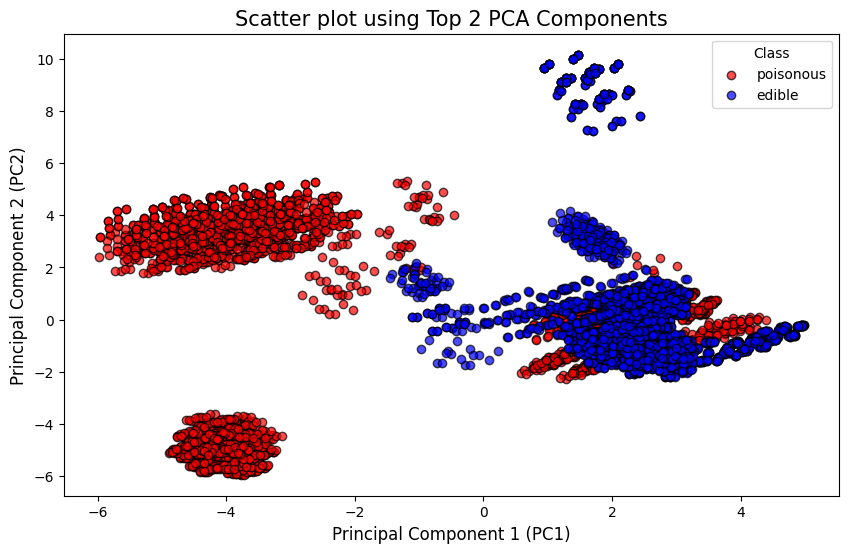

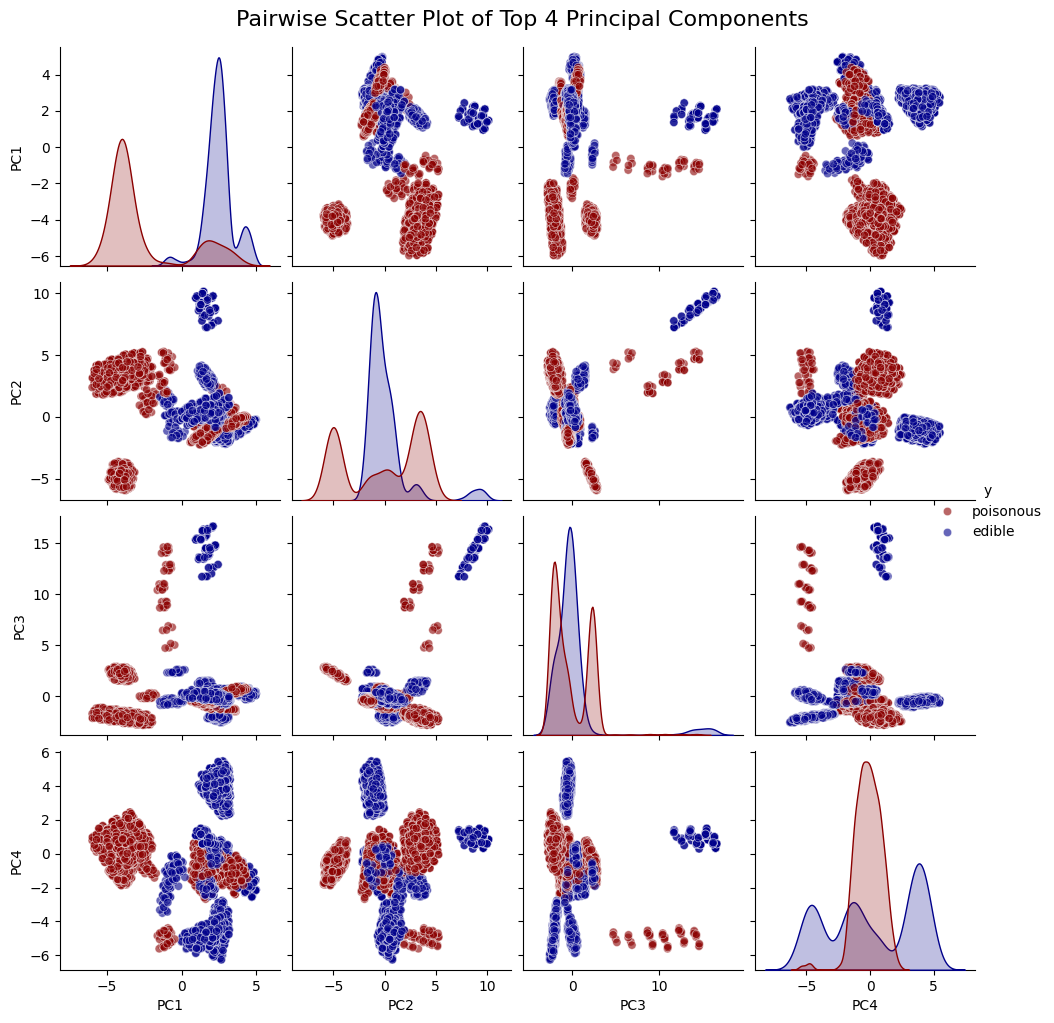

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Scatter Plot using top 2 PCA components ---
plt.figure(figsize=(10, 6))

# Plot class 0 (poisonous)
plt.scatter(
    dfx_trans.loc[y['class'] == 0, 'PC1'],
    dfx_trans.loc[y['class'] == 0, 'PC2'],
    color='red',
    label='poisonous',
    alpha=0.7,
    edgecolors='k'
)

# Plot class 1 (edible)
plt.scatter(
    dfx_trans.loc[y['class'] == 1, 'PC1'],
    dfx_trans.loc[y['class'] == 1, 'PC2'],
    color='blue',
    label='edible',
    alpha=0.7,
    edgecolors='k'
)

# Adding labels and title
plt.title("Scatter plot using Top 2 PCA Components", fontsize=15)
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)

# Add legend instead of colorbar
plt.legend(title='Class')
plt.show()



# --- Pairplot using top 4 PCA components ---
num_pcs = 4
df_pca_subset = dfx_trans.iloc[:, :num_pcs].copy()  # make a copy to avoid SettingWithCopyWarning
df_pca_subset.loc[:, 'y'] = y['class']  # add labels safely

# Define a fixed color palette for 0 and 1
palette = {0: '#8B0000', 1: '#00008B'}   # 0 = poisonous, 1 = edible

# Create pairplot with fixed colors
g = sns.pairplot(
    df_pca_subset,
    hue='y',
    palette=palette,
    markers='o',
    plot_kws={'alpha': 0.6}
)

# Replace numeric legend labels with descriptive names
new_labels = ['poisonous', 'edible']  # in order of the palette keys
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.suptitle(f"Pairwise Scatter Plot of Top {num_pcs} Principal Components", fontsize=16, y=1.02)
plt.show()




We can see that there is a **significant overlap between edible and poisonous mushroom**. From this we can coclude that we cannot create a classifier we are only using any of the two top principal components. 

## **Performance Evaluation with Logistic Regression**

### Baseline Model

Now we will split the original data into training and test dataset. We will use 80% of the original data for training and 20% for testing.

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, y['class'], test_size=0.2, random_state=42)

We will now train a Logistic Regression classifier on the training data and evaluate its performance using precision, recall, F1 score and accuracy.

In [162]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### PCA-Transformed Model

We have seen earlier that 50 is effective number of pricipal components required for training the model. So we now transform both our training and testing sets using the top 50 pricipal components

In [163]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(dfx)
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans, columns=[f'PC{i+1}' for i in range(dfx_trans.shape[1])])
dfx_trans.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117
0,3.284737,1.020105,-1.353591,-1.361726,-0.478375,-0.486227,-2.988416,-1.085874,4.908155,4.233882,...,-3.194169e-15,-9.637264e-15,3.464031e-15,-1.861113e-15,6.658701e-15,-7.966671e-15,7.569776e-15,1.535483e-14,1.249936e-14,4.221019e-15
1,3.969481,-0.856895,0.237503,-1.903058,1.281135,-2.193247,-4.367826,-0.494000,-0.960146,-1.858999,...,8.348283e-17,-1.319482e-15,1.052765e-15,2.431064e-16,1.685465e-15,-1.175229e-15,1.874246e-15,2.651453e-15,1.395203e-15,4.297347e-15
2,4.958586,-0.211112,0.466430,-1.557341,1.971429,-3.363282,-5.567695,-0.925606,-2.946658,-1.862181,...,1.360239e-15,9.252499e-16,-3.415882e-15,3.275403e-15,1.373215e-15,-4.917478e-16,2.186496e-15,-7.260757e-15,-1.586129e-15,-4.679385e-16
3,3.469967,0.337933,-1.334981,-0.881358,-0.008583,-0.638624,-3.126145,-0.874086,4.493688,4.287290,...,-7.516781e-16,-3.586549e-15,2.233953e-17,5.402151e-17,3.494565e-15,-7.467071e-15,4.017063e-15,1.447772e-16,3.459990e-15,-3.578298e-15
4,2.726570,0.889648,-2.051852,-4.117670,-2.710545,2.501482,1.354385,0.029147,-0.451190,-1.160304,...,-1.817774e-15,1.310359e-15,-2.888526e-15,2.102730e-15,-6.530185e-15,7.248588e-15,1.097089e-15,7.869501e-15,1.052980e-15,-1.753369e-15
5,3.812989,-1.267767,0.353288,-0.865661,1.721261,-2.135794,-4.219419,-0.064515,-0.860122,-2.232315,...,-6.659177e-16,1.116070e-15,-1.556259e-15,9.994458e-16,7.972871e-16,1.072973e-15,3.428558e-15,2.429408e-15,3.921473e-15,3.353657e-15
6,4.518180,-0.623080,0.571540,-1.897123,2.189959,-3.759886,-5.594440,-1.067531,-3.531083,-1.511509,...,2.222607e-16,1.702406e-15,-5.580817e-15,3.372548e-15,2.205883e-15,-1.990300e-17,1.575873e-15,-3.319466e-15,-8.488695e-16,2.537065e-16
7,4.805180,-0.570956,0.310366,-1.130596,1.966954,-2.770101,-5.313274,-0.514700,-1.348041,-1.751957,...,1.082684e-15,1.744039e-15,-8.623694e-16,3.471898e-16,-2.512565e-15,4.504256e-15,-9.221287e-16,-3.819066e-15,-3.727971e-15,-2.091640e-15
8,2.550363,0.162168,-1.286618,-0.772069,-0.023326,-0.564925,-2.452537,-0.688895,2.891146,3.244268,...,1.806273e-16,1.166319e-14,-5.400406e-15,2.290080e-15,-2.408482e-15,9.593935e-15,-4.648315e-15,-1.019938e-14,-6.474214e-15,-4.002843e-16
9,4.043775,-1.030415,0.762761,-1.641961,1.951508,-3.366376,-5.416677,-0.620975,-1.885584,-1.651148,...,-1.276540e-15,1.466484e-15,-1.361970e-15,2.095791e-15,-1.069275e-15,7.017420e-16,9.652505e-16,4.507607e-15,3.128175e-15,2.848853e-15


We will split the original data into 80% for training and 20% for testing, then train a Logistic Regression classifier on the training set and evaluate its performance using precision, recall, F1 score and accuracy.

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx_trans, y['class'], test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       782
           1       1.00      1.00      1.00       843

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Comparison and Analysis

We observe that precision, recall, F1 score, and accuracy are all equal to 1 for both the standard Logistic Regression and the one where we applied PCA.This shows that there is no significant difference in performance between the two models.

PCA reduces the number of features, which can lead to information loss. However, in this dataset the top principal components retained enough variance to preserve all the information necessary for perfect classification. Therefore, the dimensionality reduction did not negatively affect the performance.

PCA removes feature collinearity and redundancy by projecting the data onto orthogonal components. While this did not improve the performance in terms of classification accuracy it simplified the feature space.This simplification might lead to reducing overfitting.

Using logistic regression as a surrogate performance measure for evaluating the effectiveness of Principal Component Analysis (PCA) is a valuable approach because **it determines whether the principal components retain enough information from the original data to effectively predict the target variable**. Essentially, it assesses the quality of the dimensionality reduction performed by PCA.